## Group S - NSW Crime Report
### Assault - Priya Chotalia

Create a copy of this page and use it as a template. 
The data has already been prepared for you, so just import as below. 
One data set is crimeDS, it is crime data with population, employment and income data for 2016. 
The other is a time series data from 1995 to 2018 with just crime figures for each local government area (no employment, income data etc). 

Each member will create their own notebook which will be combined at the end to create
the project. You are welcome to change the datasets in memory however you need, but please dont write any changes to the files. You will also create your video presentation on your own notebook. 

We will each be allocated 2 offences, but it will probably be enough to do just one offence. 
They are allocated as follows


- Simon: Drugs, Malicious Damage

- Priya: Assault, Intimidation/stalking and harassment

- Aidan: Theft, Sexual offences

- Breegid: Robbery, Arson

### Tips

- Be sure to cover just basic data exploration as outlined earlier in the course,  I think this will be the majority of the project. 


- Use descriptive graphs, compare different LGA's for 2016 and then historically. 


- With linear, be specific with categories, fit for each LGA and category. Combining LGA's and offence categories together probably won't give you a good result


- when comparing against different LGA's, use offence_rate for comparison (normalised by population). 

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

#read data files
crimeRateTS = pd.read_csv("data/crimeRateTS.gzip", compression="gzip")
crimeDS = pd.read_csv("data/crimeDS.gzip", compression="gzip")

In [218]:
crimeDS.head()

LGA                       Offence category  Total  age_median  \
0  Albury                                  Arson     33        38.3   
1  Albury                                Assault    605        38.3   
2  Albury                          Drug offences    645        38.3   
3  Albury  Intimidation, stalking and harassment    315        38.3   
4  Albury           Malicious damage to property    685        38.3   

   age_median_female  age_median_male  population  density   code  \
0               39.4             37.1       52171    170.5  10050   
1               39.4             37.1       52171    170.5  10050   
2               39.4             37.1       52171    170.5  10050   
3               39.4             37.1       52171    170.5  10050   
4               39.4             37.1       52171    170.5  10050   

   fertility_rate  ...  asia  africa  middle-east  americas  offence_rate  \
0             2.0  ...   4.0     0.5          0.2       0.4      6.325353   
1             2.0  ...   4.0     0.5          0.2       0.4    115.964808   
2             2.0  ...   4.0     0.5          0.2       0.4    123.631903   
3             2.0  ...   4.0     0.5          0.2       0.4     60.378371   
4             2.0  ...   4.0     0.5          0.2       0.4    131.298998   

   median_income  mean_income  office  professionals  trades  
0        45382.0      50857.0    24.0           42.9    31.6  
1        45382.0      50857.0    24.0           42.9    31.6  
2        45382.0      50857.0    24.0           42.9    31.6  
3        45382.0      50857.0    24.0           42.9    31.6  
4        45382.0      50857.0    24.0           42.9    31.6  

[5 rows x 31 columns]

In [219]:
crimeRateTS.head()

LGA                       Offence category  total  year   Code  \
0  Albury                                  Arson     79  2013  10050   
1  Albury                                Assault    703  2013  10050   
2  Albury                          Drug offences    374  2013  10050   
3  Albury  Intimidation, stalking and harassment    316  2013  10050   
4  Albury           Malicious damage to property    891  2013  10050   

   population  offence_rate  
0       50338        15.694  
1       50338       139.656  
2       50338        74.298  
3       50338        62.776  
4       50338       177.003

In [220]:
crime_Assault = crimeDS
crime_Assault = crime_Assault[(crime_Assault['Offence category'] == 'Assault')]
crime_Assault.head()

LGA Offence category  Total  age_median  age_median_female  \
1              Albury          Assault    605        38.3               39.4   
9   Armidale Regional          Assault    358        35.6               36.6   
17            Ballina          Assault    256        47.1               48.2   
25          Balranald          Assault     19        40.2               40.4   
33  Bathurst Regional          Assault    398        36.4               38.1   

    age_median_male  population  density   code  fertility_rate  ...  asia  \
1              37.1       52171    170.5  10050             2.0  ...   4.0   
9              34.6       30313      3.5  10130             1.7  ...   4.2   
17             45.6       42993     88.7  10250             1.8  ...   1.5   
25             39.8        2330      0.1  10300             2.9  ...   1.8   
33             34.8       42244     11.1  10470             1.9  ...   2.3   

    africa  middle-east  americas  offence_rate  median_income  mean_income  \
1      0.5          0.2       0.4    115.964808        45382.0      50857.0   
9      0.7          1.2       0.9    118.101145        39733.0      47386.0   
17     0.7          0.1       0.8     59.544577        40397.0      48108.0   
25     0.2          0.3       0.4     81.545064        39057.0      42262.0   
33     0.4          0.3       0.5     94.214563        47994.0      54554.0   

    office  professionals  trades  
1     24.0           42.9    31.6  
9     22.1           49.5    27.0  
17    22.2           47.4    28.7  
25    14.7           40.2    41.9  
33    21.8           44.4    32.3  

[5 rows x 31 columns]

The graph below shows the relation between different variables and the number of Assault cases.

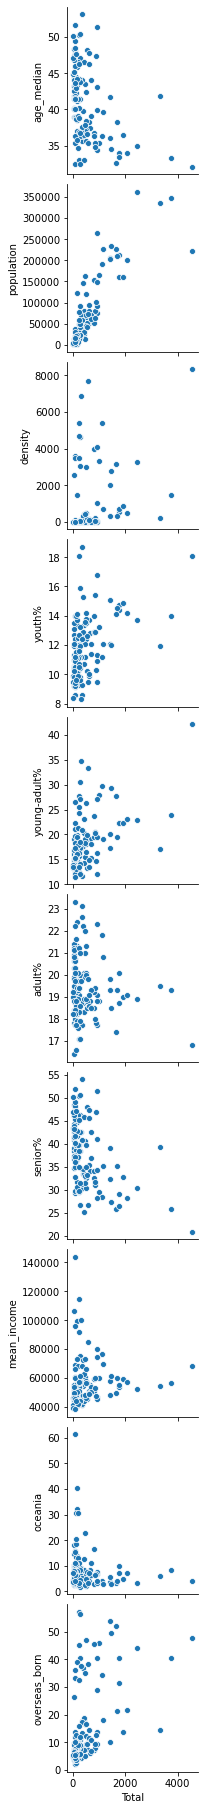

In [221]:
sns.pairplot(data = crime_Assault, x_vars = ['Total'], y_vars = ['age_median', 'population', 'density', 'youth%', 'young-adult%', 'adult%', 'senior%', 'mean_income', 'oceania', 'overseas_born'])

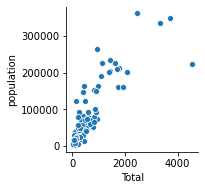

In [222]:
g = sns.pairplot(data = crime_Assault, x_vars = ['Total'], y_vars = ['population'])

As we can see from the above two graphs, population and total number of cases are strongly correlated with each other. As population increases, total number of cases also increases.

In [223]:
Assault_top = crime_Assault
Assault_top = Assault_top.groupby(['LGA', 'Offence category']).sum().sort_values('Total', ascending=False)
Assault_top.head(5)

Total  age_median  age_median_female  \
LGA                  Offence category                                         
Sydney               Assault            4560        32.1               31.3   
Blacktown            Assault            3733        33.3               33.8   
Central Coast        Assault            3326        41.8               43.2   
Canterbury-Bankstown Assault            2458        35.0               35.8   
Penrith              Assault            2074        34.0               34.6   

                                       age_median_male  population  density  \
LGA                  Offence category                                         
Sydney               Assault                      32.9      222717   8328.1   
Blacktown            Assault                      32.8      348030   1449.8   
Central Coast        Assault                      40.3      336611    200.2   
Canterbury-Bankstown Assault                      34.2      361862   3282.6   
Penrith              Assault                      33.4      201597    498.1   

                                        code  fertility_rate  death_rate  \
LGA                  Offence category                                      
Sydney               Assault           17200             1.0         4.8   
Blacktown            Assault           10750             2.1         6.0   
Central Coast        Assault           11650             1.9         6.1   
Canterbury-Bankstown Assault           11570             2.1         5.1   
Penrith              Assault           16350             1.9         6.4   

                                       children%  ...  asia  africa  \
LGA                  Offence category             ...                 
Sydney               Assault                 3.5  ...  25.9     1.0   
Blacktown            Assault                14.7  ...  22.7     1.5   
Central Coast        Assault                12.7  ...   2.6     0.7   
Canterbury-Bankstown Assault                13.1  ...  22.8     1.0   
Penrith              Assault                13.7  ...   7.1     0.9   

                                       middle-east  americas  offence_rate  \
LGA                  Offence category                                        
Sydney               Assault                   1.4       3.9    204.744137   
Blacktown            Assault                   3.7       1.0    107.260868   
Central Coast        Assault                   0.3       0.9     98.808417   
Canterbury-Bankstown Assault                   9.2       1.0     67.926447   
Penrith              Assault                   1.7       0.8    102.878515   

                                       median_income  mean_income  office  \
LGA                  Offence category                                       
Sydney               Assault                 48852.0      68007.0    18.7   
Blacktown            Assault                 51696.0      56407.0    25.6   
Central Coast        Assault                 46229.0      54428.0    24.3   
Canterbury-Bankstown Assault                 44942.0      51942.0    25.1   
Penrith              Assault                 52417.0      57287.0    27.4   

                                       professionals  trades  
LGA                  Offence category                         
Sydney               Assault                    64.9    14.5  
Blacktown            Assault                    38.5    33.9  
Central Coast        Assault                    42.2    31.9  
Canterbury-Bankstown Assault                    39.5    33.0  
Penrith              Assault                    35.4    35.3  

[5 rows x 29 columns]

From the year 2016, the top 5 LGA's were Sydney, Blacktown, Central Coast, Canterbury-Bankstown and Penrith. Here, these 5 regions will be used for comparison between year and cases.



In [224]:
Assault_year = crimeRateTS
Assault_year = Assault_year[(Assault_year['Offence category'] == 'Assault')]
Assault_year = Assault_year[(Assault_year['LGA'] ==  'Sydney') | (Assault_year['LGA'] ==  'Blacktown') |
(Assault_year['LGA'] ==  'Central Coast') | (Assault_year['LGA'] ==  'Canterbury-Bankstown') | 
(Assault_year['LGA'] ==  'Penrith')]
Assault_year.head()

LGA Offence category  total  year   Code  population  \
73              Blacktown          Assault   3729  2013  10750      324797   
185  Canterbury-Bankstown          Assault   2374  2013  11570      345692   
201         Central Coast          Assault   2787  2013  11650      327745   
721               Penrith          Assault   2040  2013  16350      190527   
833                Sydney          Assault   4898  2013  17200      196318   

     offence_rate  
73        114.810  
185        68.674  
201        85.036  
721       107.071  
833       249.493

As we can see, **Sydney** has the hignest number to crime rtes followed by **Blactown**. 

Text(0.5, 1.0, 'Top number of Assault cases based on LGA')

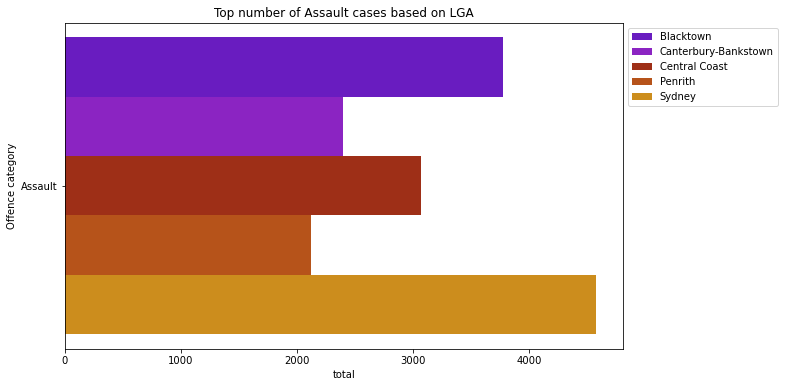

In [225]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'total',
            y = 'Offence category', 
            data = Assault_year, 
            hue = 'LGA', 
            palette = 'gnuplot',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top number of Assault cases based on LGA')

The graph below shows the total number of Assault cases from the year 2013 to 2018. Sydney has remain on top having highest number of cases. 

Text(0.5, 1.0, 'Assault cases from year 2013 to 2018')

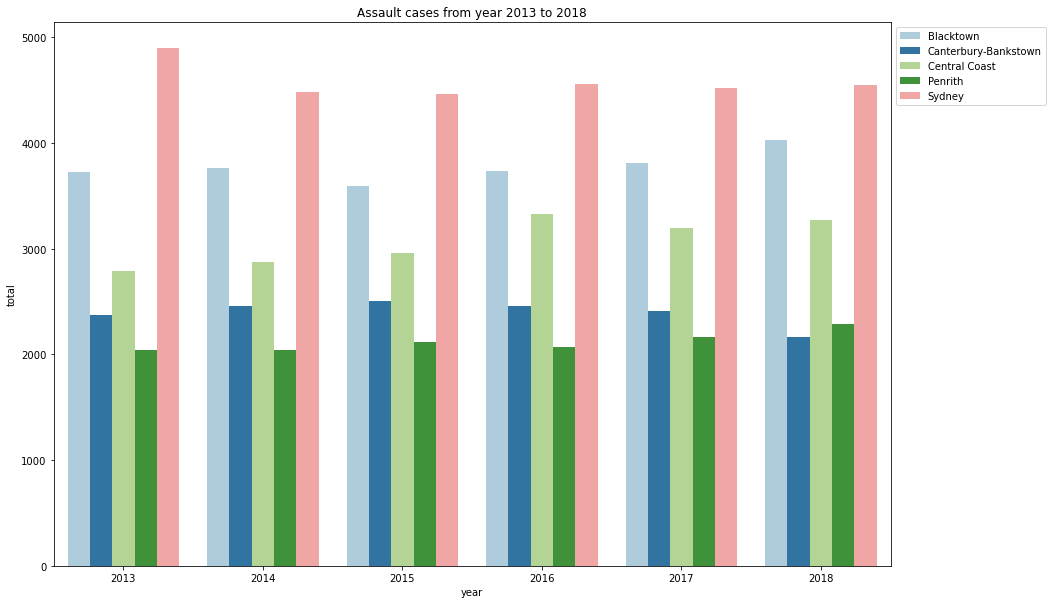

In [231]:
plt.figure(figsize=(15,10)) 
 
sns.barplot(x = 'year',
            y = 'total', 
            data = Assault_year, 
            hue = 'LGA', 
            palette = 'Paired',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Assault cases from year 2013 to 2018')

Text(0.5, 1.0, 'Assault cases in different LGA based on year 2013 to 2018')

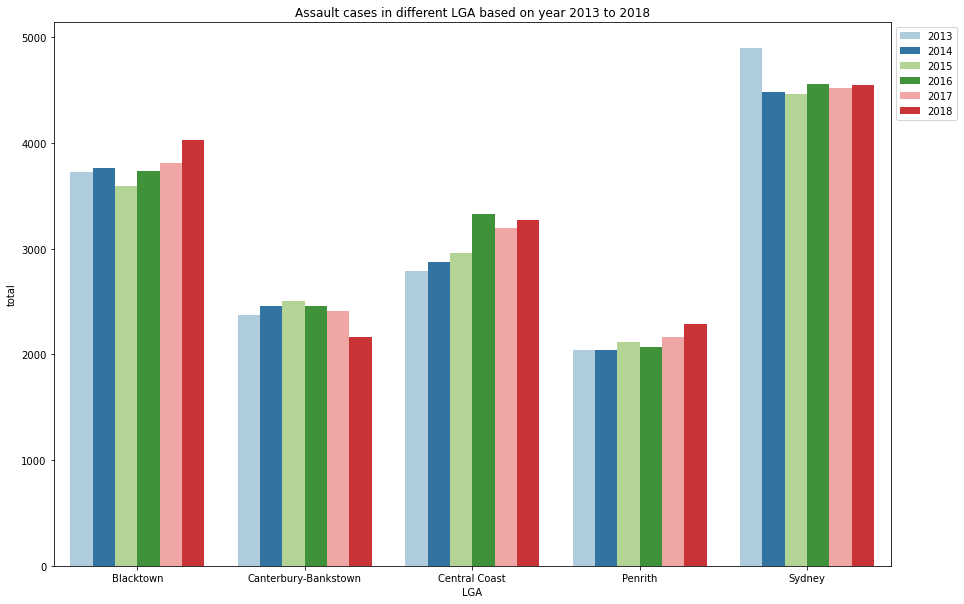

In [232]:
plt.figure(figsize=(15,10)) 
 
sns.barplot(x = 'LGA',
            y = 'total', 
            data = Assault_year, 
            hue = 'year', 
            palette = 'Paired',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Assault cases in different LGA based on year 2013 to 2018')

## Linear Regression

In [160]:
Sydney_A = crimeRateTS[(crimeRateTS['LGA'] == 'Sydney') & (crimeRateTS['Offence category'] == 'Assault')]
Sydney_A

LGA Offence category  total  year   Code  population  offence_rate
833   Sydney          Assault   4898  2013  17200      196318       249.493
1849  Sydney          Assault   4486  2014  17200      204516       219.347
2865  Sydney          Assault   4465  2015  17200      214037       208.609
3881  Sydney          Assault   4560  2016  17200      222717       204.744
4897  Sydney          Assault   4520  2017  17200      233177       193.844
5913  Sydney          Assault   4551  2018  17200      240229       189.444

In [161]:
year_n = []
for x in range (0, 6):
    year_n.append(x)
print(year_n)

[0, 1, 2, 3, 4, 5]


In [162]:
reg = LinearRegression(fit_intercept = True)

x = np.array(year_n).reshape(6,1)
y = Sydney_A.offence_rate

reg.fit(x, y)

print ("Coefficients: ", reg.coef_)
print ("Intercept: ", reg.intercept_)

Coefficients:  [-10.87482857]
Intercept:  238.1005714285714


MSE: 47.59987758095233
R^2: 0.8620015531920996


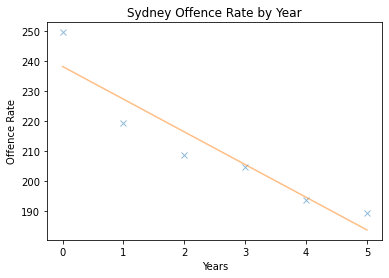

In [163]:
lr_s = LinearRegression()
lr_s.fit(x,y)
y_pred = lr_s.predict(x)
plt.plot(x, y,'x', alpha = 0.5)
plt.plot(x, y_pred, alpha = 0.5)
plt.title('Sydney Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_pred, y))
print ("R^2:", r2_score(y_pred, y))

In [164]:
blacktown_A = crimeRateTS[(crimeRateTS['LGA'] == 'Blacktown') & (crimeRateTS['Offence category'] == 'Assault')]
blacktown_A

LGA Offence category  total  year   Code  population  offence_rate
73    Blacktown          Assault   3729  2013  10750      324797       114.810
1089  Blacktown          Assault   3765  2014  10750      331825       113.463
2105  Blacktown          Assault   3593  2015  10750      339449       105.848
3121  Blacktown          Assault   3733  2016  10750      348030       107.261
4137  Blacktown          Assault   3809  2017  10750      357839       106.445
5153  Blacktown          Assault   4031  2018  10750      366534       109.976

In [165]:
reg = LinearRegression(fit_intercept = True)

x = np.array(year_n).reshape(6,1)
y = blacktown_A.offence_rate

reg.fit(x, y)

print ("Coefficients: ", reg.coef_)
print ("Intercept: ", reg.intercept_)

Coefficients:  [-1.25174286]
Intercept:  112.76319047619047


MSE: 7.380628946031742
R^2: -0.6150141439333632


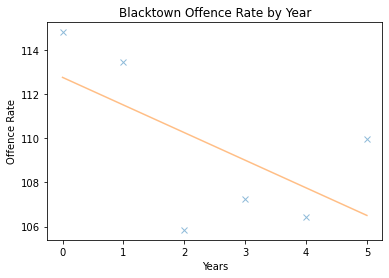

In [168]:
lr_b = LinearRegression()
lr_b.fit(x,y)
y_pred = lr_b.predict(x)
plt.plot(x, y,'x', alpha = 0.5)
plt.plot(x, y_pred, alpha = 0.5)
plt.title('Blacktown Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_pred, y))
print ("R^2:", r2_score(y_pred, y))

Linear regression was performed using the number of years passed vs offence rate. The outputs of these regressions it that for the Assault cases within blacktown, the linear regressions do not work well. This is because the r2 value is negative and also have very higher error values. For the Assault cases in Sydney, the regression obtains a high r2 value which is 0.86 almost being 1.

The above regressions produced shows that the dependant variables can be explained well by the independant variable. Therefore a simple model like linear regression would not be able to capture the various other factors which influence the offence rate.

## K Nearest Neighbours
KNN algorithm is used to find the groups similar are near to each other. Using KNN in this datset in such a way that it will select clusters which are similar to each other. Here 4 clusters will be used. The variables would be same as taken from linear regression model.


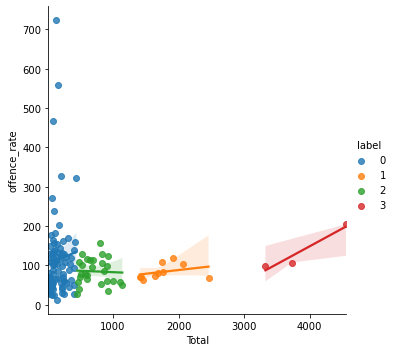

In [192]:
from sklearn.cluster import KMeans
Assault_k = crime_Assault[['Total', 'offence_rate']].copy()
knn = KMeans(n_clusters=4)
knn.fit(Assault_k)
Assault_k['label'] = knn.predict(Assault_k)
sns.lmplot("Total", "offence_rate", data=Assault_k, hue='label')

In [214]:
crime_Assault[Assault_k['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head()

LGA  age_median  population  youth%  young-adult%  adult%  \
9   Armidale Regional        35.6       30313    18.7          17.3    17.7   
17            Ballina        47.1       42993     9.8          14.3    19.8   
25          Balranald        40.2        2330    12.1          16.6    18.4   
33  Bathurst Regional        36.4       42244    15.3          18.5    18.7   
49        Bega Valley        50.3       33941     9.3          12.4    19.1   

    senior%  mean_income  oceania  overseas_born  office  professionals  \
9      34.5      47386.0      8.8           12.3    22.1           49.5   
17     46.2      48108.0      5.2           11.0    22.2           47.4   
25     38.5      42262.0     10.1            6.3    14.7           40.2   
33     33.4      54554.0      6.7            8.6    21.8           44.4   
49     50.4      44685.0      4.4           11.6    21.6           41.9   

    trades  
9     27.0  
17    28.7  
25    41.9  
33    32.3  
49    35.0

In [194]:
crime_Assault[Assault_k['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median          42.111364
population       21727.454545
youth%              11.327273
young-adult%        16.960227
adult%              19.459091
senior%             39.765909
mean_income      54270.625000
oceania              9.043182
overseas_born       11.595455
office              18.769318
professionals       46.981818
trades              32.351136
dtype: float64

In [213]:
crime_Assault[Assault_k['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head()

LGA  age_median  population  youth%  young-adult%  \
169          Campbelltown        34.0      161566    14.4          22.2   
185  Canterbury-Bankstown        35.0      361862    13.7          22.8   
281            Cumberland        32.6      225691    14.1          27.7   
321             Fairfield        36.1      205675    15.1          20.1   
513        Lake Macquarie        41.7      202332    12.1          17.2   

     adult%  senior%  mean_income  oceania  overseas_born  office  \
169    18.7     29.1      53404.0      9.8           31.4    25.9   
185    18.9     30.3      51942.0      3.3           44.0    25.1   
281    17.4     25.9      49593.0      3.2           52.2    23.5   
321    19.8     32.3      48052.0      3.6           53.9    23.5   
513    19.3     39.1      57506.0      5.5           10.0    24.4   

     professionals  trades  
169           35.0    37.1  
185           39.5    33.0  
281           37.5    35.9  
321           31.7    42.0  
513           41.5    32.7

In [196]:
crime_Assault[Assault_k['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           35.61
population       217625.10
youth%               13.97
young-adult%         22.63
adult%               19.01
senior%              30.65
mean_income       55257.10
oceania               5.13
overseas_born        33.87
office               24.38
professionals        40.59
trades               32.95
dtype: float64

In [210]:
crime_Assault[Assault_k['label'] == 2][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head()

LGA  age_median  population  youth%  young-adult%  adult%  \
1             Albury        38.3       52171    13.7          19.2    18.6   
41           Bayside        35.3      164534    13.2          27.9    18.8   
97    Blue Mountains        43.5       78835    11.2          15.4    21.0   
217         Cessnock        37.4       56720    12.8          19.1    18.8   
225  Clarence Valley        48.2       51622    10.2          13.3    18.8   

     senior%  mean_income  oceania  overseas_born  office  professionals  \
1       35.3      50857.0      4.0           10.8    24.0           42.9   
41      29.6      59992.0      3.6           46.0    25.0           44.8   
97      40.6      60466.0      4.1           16.8    20.9           53.3   
217     34.1      55219.0      8.3            6.3    21.3           32.1   
225     48.0      45451.0      7.6            7.5    22.9           40.9   

     trades  
1      31.6  
41     28.1  
97     24.6  
217    45.0  
225    34.4

In [202]:
crime_Assault[Assault_k['label'] == 2][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           39.944444
population       101337.814815
youth%               12.274074
young-adult%         19.614815
adult%               19.462963
senior%              36.462963
mean_income       58444.629630
oceania               5.800000
overseas_born        19.522222
office               23.107407
professionals        46.192593
trades               29.070370
dtype: float64

In [203]:
crime_Assault[Assault_k['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head()

LGA  age_median  population  youth%  young-adult%  adult%  \
73       Blacktown        33.3      348030    14.0          23.9    19.3   
201  Central Coast        41.8      336611    11.9          17.0    19.5   
841         Sydney        32.1      222717    18.1          42.1    16.8   

     senior%  mean_income  oceania  overseas_born  office  professionals  \
73      25.8      56407.0      8.4           40.4    25.6           38.5   
201     39.4      54428.0      5.8           14.6    24.3           42.2   
841     20.9      68007.0      4.2           47.7    18.7           64.9   

     trades  
73     33.9  
201    31.9  
841    14.5

In [204]:
crime_Assault[Assault_k['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           35.733333
population       302452.666667
youth%               14.666667
young-adult%         27.666667
adult%               18.533333
senior%              28.700000
mean_income       59614.000000
oceania               6.133333
overseas_born        34.233333
office               22.866667
professionals        48.533333
trades               26.766667
dtype: float64

KNN algorithm fitts really well in this dataset. KNN has divided the dataset into 4 different clusters.
* In the first cluster, age_median is 42.111364 and population is 21727.454545.
* In the second cluster, age_median is 35.61 and population is217625.10. 
* In third cluster, age_median is 39.944444 and population is 101337.814815. 
* However, fourth cluster is outlier which contains only 3 rows. 